libraries Used

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import html5lib
import os


Scraping Website

In [2]:
all_data_21_22=pd.read_html(r"https://en.wikipedia.org/wiki/2021%E2%80%9322_Indian_Super_League")
all_data_22_23=pd.read_html(r"https://en.wikipedia.org/wiki/2022%E2%80%9323_Indian_Super_League")
all_data_23_24=pd.read_html(r"https://en.wikipedia.org/wiki/2023%E2%80%9324_Indian_Super_League")

ISL Tables

In [3]:
ISL2021_22=all_data_21_22[5]
ISL2022_23=all_data_22_23[5]
ISL2023_24=all_data_23_24[5]

In [4]:
ISL2023_24=ISL2023_24.drop('Qualification',axis=1)
ISL2023_24['Pts']=ISL2023_24['Pts'].str.replace('[b]','')
ISL2023_24['Year']='2023-24'

ISL2022_23=ISL2022_23.drop('Qualification',axis=1)
ISL2022_23['Pts']=ISL2022_23['Pts'].str.replace('[h]','')
ISL2022_23['Pts']=ISL2022_23['Pts'].str.replace('[i]','')
ISL2022_23['Pts']=ISL2022_23['Pts'].str.replace('[j]','')
ISL2022_23['Year']= '2022-23'

ISL2021_22=ISL2021_22.drop('Qualification',axis=1)
ISL2021_22['Team']=ISL2021_22['Team'].str.replace('(C)','(W)')
ISL2021_22['Team']=ISL2021_22['Team'].str.replace('(L)','(C)')
ISL2021_22['Year']='2021-22'

All Years ISL Table

In [5]:
all_year=pd.concat([ISL2021_22,ISL2022_23,ISL2023_24],ignore_index=True)
all_year["Team"]=all_year["Team"].str.replace('(C)',"")
all_year["Team"]=all_year["Team"].str.replace('(W)',"")
all_year['Pts']=all_year['Pts'].astype(int)
all_year['GD']=all_year['GF']-all_year['GA']
all_year['Pts']=all_year['Pts'].astype(int)
all_year['Pts per match']=round(all_year['Pts']/all_year['Pld'],2)
all_year['Py Exp']=round(all_year['GF']**2/(all_year['GF']**2+all_year['GA']**2),2)#.astype(int)
all_year['Win%']=round(all_year['W']/all_year['Pld'],2)
all_year
# all_year.dtypes

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Year,Pts per match,Py Exp,Win%
0,1,Jamshedpur,20,13,4,3,42,21,21,43,2021-22,2.15,0.80,0.65
1,2,Hyderabad,20,11,5,4,43,23,20,38,2021-22,1.90,0.78,0.55
2,3,ATK Mohun Bagan,20,10,7,3,37,26,11,37,2021-22,1.85,0.67,0.50
3,4,Kerala Blasters,20,9,7,4,34,24,10,34,2021-22,1.70,0.67,0.45
4,5,Mumbai City,20,9,4,7,36,31,5,31,2021-22,1.55,0.57,0.45
5,6,Bengaluru,20,8,5,7,32,27,5,29,2021-22,1.45,0.58,0.40
6,7,Odisha,20,6,5,9,31,43,-12,23,2021-22,1.15,0.34,0.30
7,8,Chennaiyin,20,5,5,10,17,35,-18,20,2021-22,1.00,0.19,0.25
8,9,Goa,20,4,7,9,29,35,-6,19,2021-22,0.95,0.41,0.20
9,10,NorthEast United,20,3,5,12,25,43,-18,14,2021-22,0.70,0.25,0.15


Top 6 Teams 

In [6]:
Top6_table=pd.DataFrame()
for i in range(1,7):
    new_row=pd.DataFrame(all_year[all_year['Pos']==i],columns=['Pos','Pld','W',"D","L",'GF','GA','GD','Pts','Py Exp','Pts per match','Win%'])
    Top6_table=pd.concat([Top6_table,new_row])
Top6_table

,Pos,Pld,W,D,L,GF,GA,GD,Pts,Py Exp,Pts per match,Win%
0,1,20,13,4,3,42,21,21,43,0.80,2.15,0.65
11,1,20,14,4,2,54,21,33,46,0.87,2.30,0.70
22,1,22,15,3,4,47,26,21,48,0.77,2.18,0.68
1,2,20,11,5,4,43,23,20,38,0.78,1.90,0.55
12,2,20,13,3,4,36,16,20,42,0.84,2.10,0.65
23,2,22,14,5,3,42,19,23,47,0.83,2.14,0.64
2,3,20,10,7,3,37,26,11,37,0.67,1.85,0.50
13,3,20,10,4,6,24,17,7,34,0.67,1.70,0.50
24,3,22,13,6,3,39,21,18,45,0.78,2.05,0.59
3,4,20,9,7,4,34,24,10,34,0.67,1.70,0.45


Average of Top 6 Teams

In [7]:
Avg6_table=pd.DataFrame()

for j in range(1,7):
    new_avg_row=pd.DataFrame(Top6_table[Top6_table['Pos']==j].mean()).transpose()
    Avg6_table=pd.concat([Avg6_table,new_avg_row])
    
Avg6_table=Avg6_table.reset_index(drop=True)    
Avg6_table

,Pos,Pld,W,D,L,GF,GA,GD,Pts,Py Exp,Pts per match,Win%
0,1.0,20.666667,14.000000,3.666667,3.000000,47.666667,22.666667,25.000000,45.666667,0.813333,2.210000,0.676667
1,2.0,20.666667,12.666667,4.333333,3.666667,40.333333,19.333333,21.000000,42.333333,0.816667,2.046667,0.613333
2,3.0,20.666667,11.000000,5.666667,4.000000,33.333333,21.333333,12.000000,38.666667,0.706667,1.866667,0.530000
3,4.0,20.666667,10.333333,4.666667,5.666667,32.000000,23.333333,8.666667,35.666667,0.650000,1.723333,0.500000
4,5.0,20.666667,9.666667,2.666667,8.333333,32.000000,30.000000,2.000000,31.666667,0.530000,1.533333,0.466667
5,6.0,20.666667,8.333333,3.666667,8.666667,29.333333,31.666667,-2.333333,28.666667,0.463333,1.393333,0.403333


KBFC

In [8]:
KBFC=all_year[all_year['Team']=='Kerala Blasters']

KBFC

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Year,Pts per match,Py Exp,Win%
3,4,Kerala Blasters,20,9,7,4,34,24,10,34,2021-22,1.70,0.67,0.45
15,5,Kerala Blasters,20,10,1,9,28,28,0,31,2022-23,1.55,0.50,0.50
26,5,Kerala Blasters,22,10,3,9,32,31,1,33,2023-24,1.50,0.52,0.45


In [9]:
desktop_path =r"C:\Users\preci\Downloads\New folder"

Pythagorean Expectation of KBFC

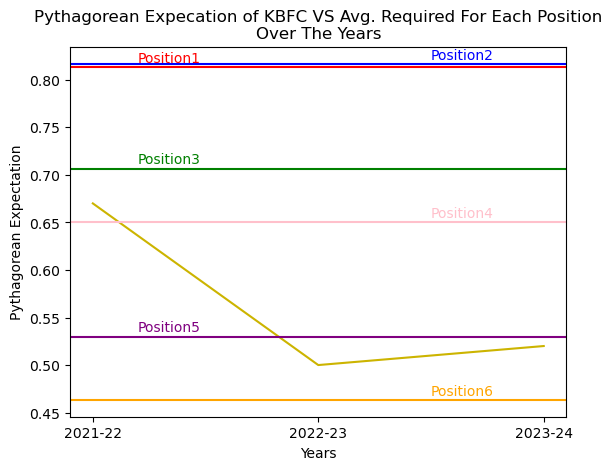

In [10]:
#plt.figure(figsize=(6,6))
plt.plot(KBFC['Year'],KBFC['Py Exp'],color='#CCB400')
plt.title('''Pythagorean Expecation of KBFC VS Avg. Required For Each Position
Over The Years''')
plt.xlabel('Years')
plt.ylabel('Pythagorean Expectation')
colors = ['red', 'blue', 'green', 'pink', 'purple', 'orange']
for i in range(0,len(Avg6_table)):
    plt.axhline(Avg6_table.loc[i,'Py Exp'],color=colors[i])
    if i%2==0:
        plt.text(0.2,Avg6_table.loc[i,'Py Exp']+0.005,f'Position{i+1}',color=colors[i])
    else:
        plt.text(1.5,Avg6_table.loc[i,'Py Exp']+0.005,f'Position{i+1}',color=colors[i])
file_path = os.path.join(desktop_path, "Pythagorean Expectation")
# plt.savefig(file_path)    
plt.show()

Win% of KBFC 

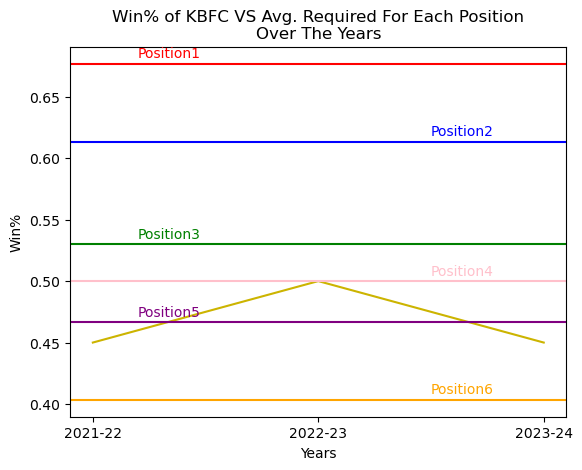

In [11]:
#plt.figure(figsize=(6,6))
plt.plot(KBFC['Year'],KBFC['Win%'],color='#CCB400')
plt.title('''Win% of KBFC VS Avg. Required For Each Position
Over The Years''')
plt.xlabel('Years')
plt.ylabel('Win%')
colors = ['red', 'blue', 'green', 'pink', 'purple', 'orange']
for i in range(0,len(Avg6_table)):
    plt.axhline(Avg6_table.loc[i,'Win%'],color=colors[i])
    if i%2==0:
        plt.text(0.2,Avg6_table.loc[i,'Win%']+0.005,f'Position{i+1}',color=colors[i])
    else:
        plt.text(1.5,Avg6_table.loc[i,'Win%']+0.005,f'Position{i+1}',color=colors[i])
file_path = os.path.join(desktop_path, "Win%")
plt.savefig(file_path)    
plt.show()

Actual Win% vs Pythagorean Expectation of KBFC

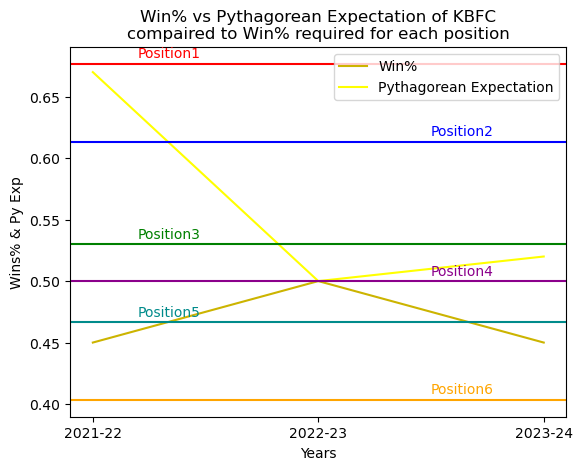

In [12]:
#plt.figure(figsize=(6,6))
plt.plot(KBFC['Year'],KBFC['Win%'],color='#CCB400',label="Win%")
plt.plot(KBFC['Year'],KBFC['Py Exp'],color='Yellow',label="Pythagorean Expectation")
plt.legend()
plt.title('''Win% vs Pythagorean Expectation of KBFC
compaired to Win% required for each position''')
plt.xlabel('Years')
plt.ylabel('Wins% & Py Exp')
colors = ['red', 'blue', 'green', '#8B008B', '#008B8B', 'orange']
for i in range(0,len(Avg6_table)):
    plt.axhline(Avg6_table.loc[i,'Win%'],color=colors[i])
    if i%2==0:
        plt.text(0.2,Avg6_table.loc[i,'Win%']+0.005,f'Position{i+1}',color=colors[i])
    else:
        plt.text(1.5,Avg6_table.loc[i,'Win%']+0.005,f'Position{i+1}',color=colors[i])
file_path = os.path.join(desktop_path, "Wins% vs Py Exp")
plt.savefig(file_path)    

plt.show()

Points per match of KBFC

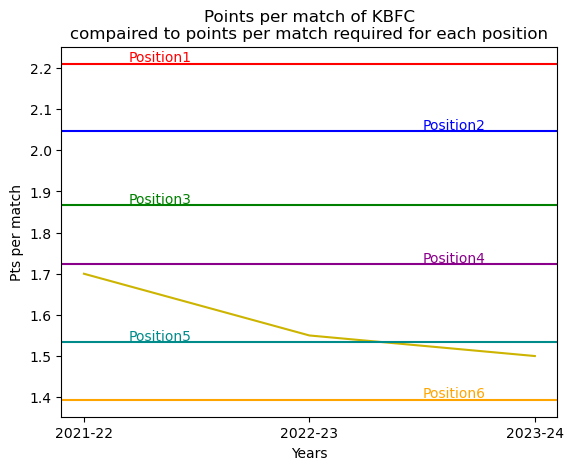

In [13]:
#plt.figure(figsize=(6,6))
plt.plot(KBFC['Year'],KBFC['Pts per match'],color='#CCB400')

plt.title('''Points per match of KBFC
compaired to points per match required for each position''')
plt.xlabel('Years')
plt.ylabel('Pts per match')
colors = ['red', 'blue', 'green', '#8B008B', '#008B8B', 'orange']
for i in range(0,len(Avg6_table)):
    plt.axhline(Avg6_table.loc[i,'Pts per match'],color=colors[i])
    if i%2==0:
        plt.text(0.2,Avg6_table.loc[i,'Pts per match']+0.005,f'Position{i+1}',color=colors[i])
    else:
        plt.text(1.5,Avg6_table.loc[i,'Pts per match']+0.005,f'Position{i+1}',color=colors[i])
file_path = os.path.join(desktop_path, "Pts per match")
plt.savefig(file_path)    

plt.show()

ISL data from https://www.indiansuperleague.com/stats

In [14]:
ISL=pd.read_excel(r"C:\Users\preci\OneDrive - Università degli Studi di Milano\ISL .xlsx")
Season_list=list(ISL['Season'].unique())

In [15]:
ISL['Chances Converted']=round(ISL['Goals']/ISL['Chances Created'],2)
ISL

,Club,Games Played,Goals,Crosses,Clean Sheets,Chances Created,Successful Pass,Touches,Successful Tackles,Saves,Wins,Draw,Season,Chances Converted
0,FC Goa,25,43,611,9,333,8443,15424,237,44,14,6,2023-24,0.13
1,Mumbai City FC,25,48,489,9,255,8951,15351,221,51,17,5,2023-24,0.19
2,Chennaiyin FC,23,27,482,3,209,5331,11631,220,77,8,3,2023-24,0.13
3,Jamshedpur FC,22,28,457,5,206,6015,12033,235,73,5,6,2023-24,0.14
4,Bengaluru FC,22,20,430,5,188,6605,12240,197,70,5,7,2023-24,0.11
5,Mohun Bagan Super Giant,25,51,429,9,286,8271,14838,258,50,16,3,2023-24,0.18
6,Kerala Blasters FC,23,33,418,5,199,6575,12421,219,58,10,3,2023-24,0.17
7,Odisha FC,25,39,399,9,212,9563,16237,273,83,13,6,2023-24,0.18
8,Hyderabad FC,22,10,336,1,186,6828,11157,194,66,1,5,2023-24,0.05
9,NorthEast United FC,22,30,335,4,173,4915,10615,248,57,6,8,2023-24,0.17


In [16]:
ISL['Pts']=ISL['Wins']*3+ISL['Draw']

In [17]:
ISL23_24=ISL[ISL["Season"]=='2023-24'].sort_values('Pts',ascending=False)
ISL22_23=ISL[ISL["Season"]=='2022-23'].sort_values('Pts',ascending=False)
ISL21_22=ISL[ISL["Season"]=='2021-22'].sort_values('Pts',ascending=False)
ISL21_22

,Club,Games Played,Goals,Crosses,Clean Sheets,Chances Created,Successful Pass,Touches,Successful Tackles,Saves,Wins,Draw,Season,Chances Converted,Pts
23,Hyderabad FC,23,47,487,3,210,5652,12360,212,64,13,5,2021-22,0.22,44
24,Jamshedpur FC,22,43,410,7,213,4169,10374,207,45,13,5,2021-22,0.20,44
25,Mohun Bagan Super Giant,22,39,379,6,229,6905,12998,193,58,11,7,2021-22,0.17,40
26,Kerala Blasters FC,23,37,317,8,189,5776,12172,213,54,10,8,2021-22,0.20,38
27,Mumbai City FC,20,36,374,6,197,6502,11785,165,50,9,4,2021-22,0.18,31
28,Bengaluru FC,20,32,362,5,171,5671,11155,195,52,8,5,2021-22,0.19,29
29,Odisha FC,20,31,246,3,140,5070,10356,190,55,6,5,2021-22,0.22,23
33,Chennaiyin FC,20,17,344,3,150,5549,11031,191,65,5,5,2021-22,0.11,20
30,FC Goa,20,29,372,2,218,7648,13231,177,41,4,7,2021-22,0.13,19
31,NorthEast United FC,20,25,272,2,187,4703,10063,163,77,3,5,2021-22,0.13,14


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Mumbai City FC'),
  Text(1, 0, 'Mohun Bagan Super Giant'),
  Text(2, 0, 'FC Goa'),
  Text(3, 0, 'Odisha FC'),
  Text(4, 0, 'Kerala Blasters FC'),
  Text(5, 0, 'Chennaiyin FC'),
  Text(6, 0, 'NorthEast United FC'),
  Text(7, 0, 'East Bengal FC'),
  Text(8, 0, 'Punjab FC'),
  Text(9, 0, 'Bengaluru FC'),
  Text(10, 0, 'Jamshedpur FC'),
  Text(11, 0, 'Hyderabad FC')])

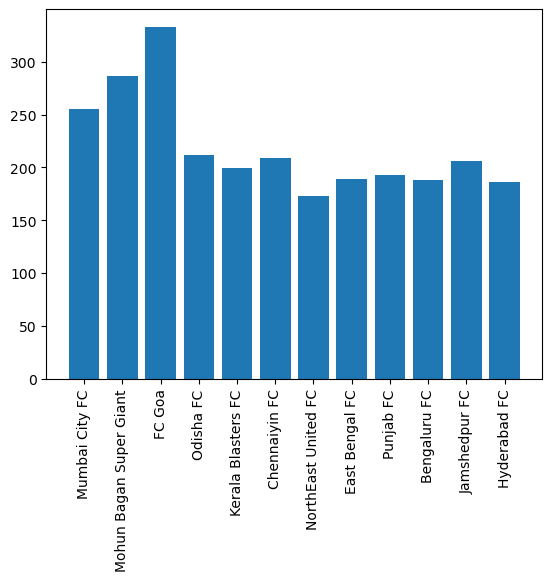

In [18]:
plt.bar(ISL23_24['Club'],ISL23_24['Chances Created'])
plt.xticks(rotation='vertical')

In [19]:
ISL_KBFC=ISL[ISL['Club']=='Kerala Blasters FC']
ISL_KBFC=ISL_KBFC.sort_values(by='Season')

ISL_KBFC

,Club,Games Played,Goals,Crosses,Clean Sheets,Chances Created,Successful Pass,Touches,Successful Tackles,Saves,Wins,Draw,Season,Chances Converted,Pts
26,Kerala Blasters FC,23,37,317,8,189,5776,12172,213,54,10,8,2021-22,0.20,38
18,Kerala Blasters FC,21,28,414,5,189,6915,12946,242,46,10,1,2022-23,0.15,31
6,Kerala Blasters FC,23,33,418,5,199,6575,12421,219,58,10,3,2023-24,0.17,33


In [20]:
ISL23_24['Pos']=list(range(1,len(ISL23_24)+1))
ISL22_23['Pos']=list(range(1,len(ISL22_23)+1))
ISL21_22['Pos']=list(range(1,len(ISL21_22)+1))

Average of Top 6 ISL Teams

In [21]:
ISL_AVG_6=pd.concat([ISL23_24[0:6], ISL22_23[0:6],ISL21_22[0:6]])
ISL_AVG_6_modify=ISL_AVG_6.drop(['Club','Season'],axis=1)
ISL_AVG_6_modify

,Games Played,Goals,Crosses,Clean Sheets,Chances Created,Successful Pass,Touches,Successful Tackles,Saves,Wins,Draw,Chances Converted,Pts,Pos
1,25,48,489,9,255,8951,15351,221,51,17,5,0.19,56,1
5,25,51,429,9,286,8271,14838,258,50,16,3,0.18,51,2
0,25,43,611,9,333,8443,15424,237,44,14,6,0.13,48,3
7,25,39,399,9,212,9563,16237,273,83,13,6,0.18,45,4
6,23,33,418,5,199,6575,12421,219,58,10,3,0.17,33,5
2,23,27,482,3,209,5331,11631,220,77,8,3,0.13,27,6
12,22,56,390,7,256,8806,14737,249,64,14,4,0.22,46,1
19,24,28,425,12,261,7676,14481,269,69,13,5,0.11,44,2
15,22,36,460,12,199,6018,12589,200,61,13,4,0.18,43,3
16,24,32,386,7,204,5797,12734,213,71,14,1,0.16,43,4


In [22]:
ISL_AVG_6_Pos=ISL_AVG_6_modify.groupby('Pos').mean()
ISL_AVG_6_Pos

,Games Played,Goals,Crosses,Clean Sheets,Chances Created,Successful Pass,Touches,Successful Tackles,Saves,Wins,Draw,Chances Converted,Pts
Pos,,,,,,,,,,,,,
1,23.333333,50.333333,455.333333,6.333333,240.333333,7803.000000,14149.333333,227.333333,59.666667,14.666667,4.666667,0.210000,48.666667
2,23.666667,40.666667,421.333333,9.333333,253.333333,6705.333333,13231.000000,244.666667,54.666667,14.000000,4.333333,0.163333,46.333333
3,23.000000,39.333333,483.333333,9.000000,253.666667,7122.000000,13670.333333,210.000000,54.333333,12.666667,5.666667,0.160000,43.666667
4,24.000000,36.000000,367.333333,8.000000,201.666667,7045.333333,13714.333333,233.000000,69.333333,12.333333,5.000000,0.180000,42.000000
5,21.333333,32.333333,402.000000,5.333333,195.000000,6664.000000,12384.000000,208.666667,51.333333,9.666667,2.666667,0.166667,31.666667
6,21.333333,29.666667,404.666667,3.333333,190.000000,5522.333333,11465.333333,205.666667,61.666667,8.333333,3.666667,0.160000,28.666667


In [23]:
ISL_AVG_6_modify2=ISL_AVG_6_modify.drop(['Pos','Games Played'],axis=1)

list(ISL_AVG_6_modify2.columns)

['Goals',
 'Crosses',
 'Clean Sheets',
 'Chances Created',
 'Successful Pass',
 'Touches',
 'Successful Tackles',
 'Saves',
 'Wins',
 'Draw',
 'Chances Converted',
 'Pts']

KBFC requirements to achive different position in ISL

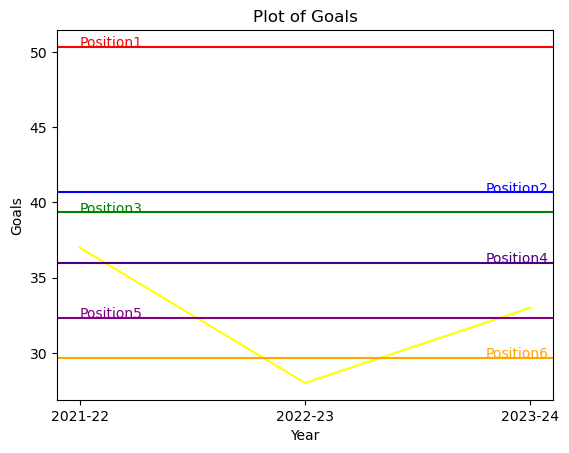

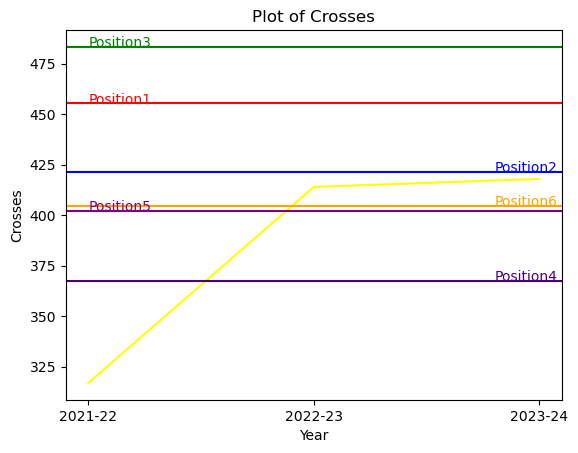

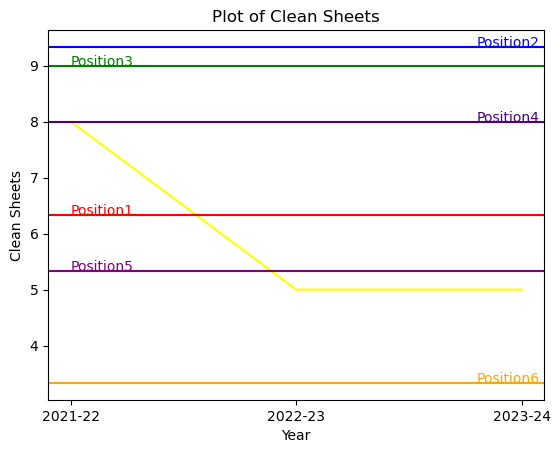

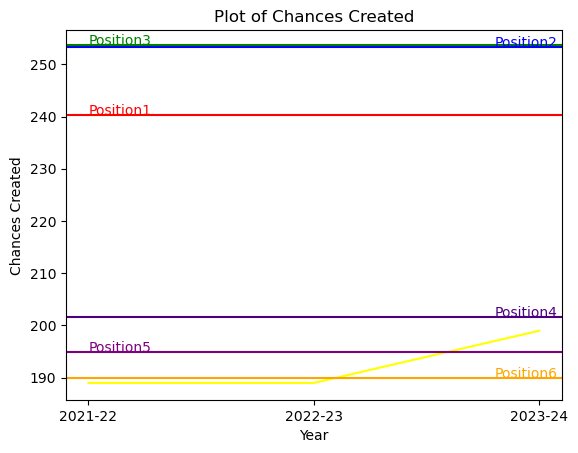

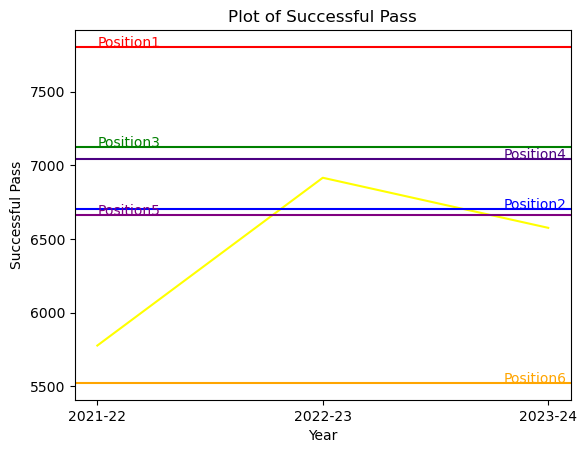

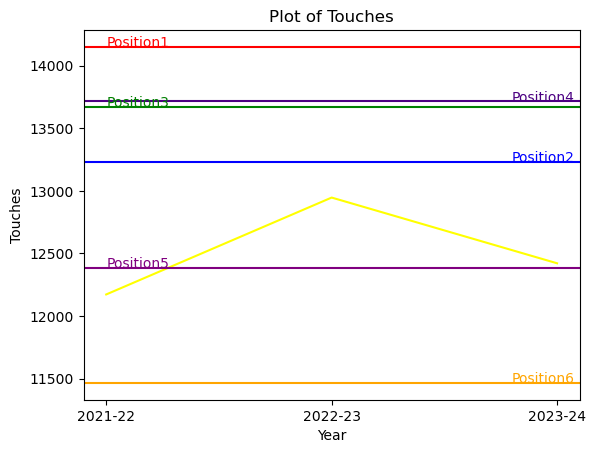

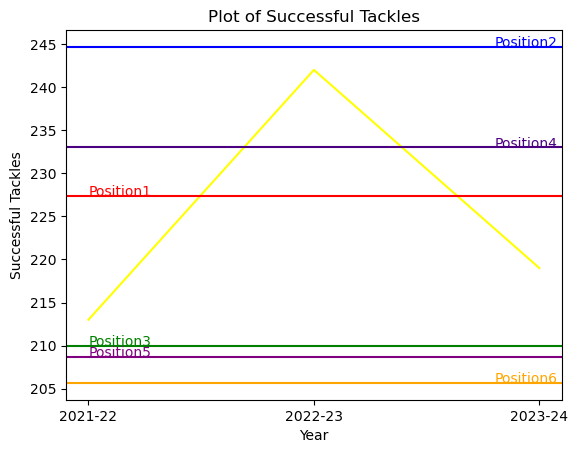

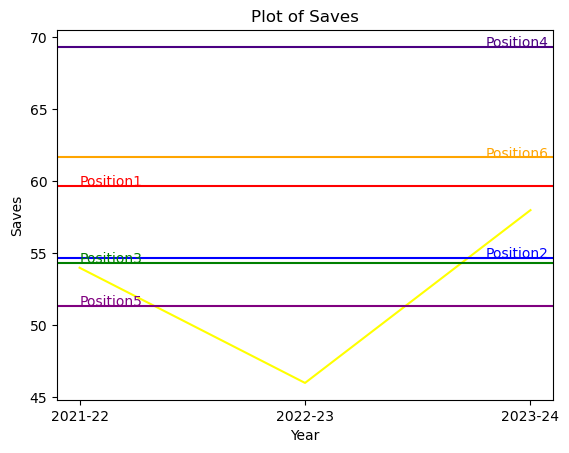

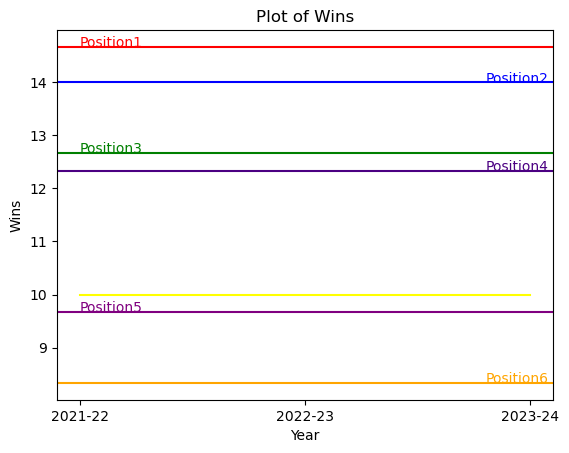

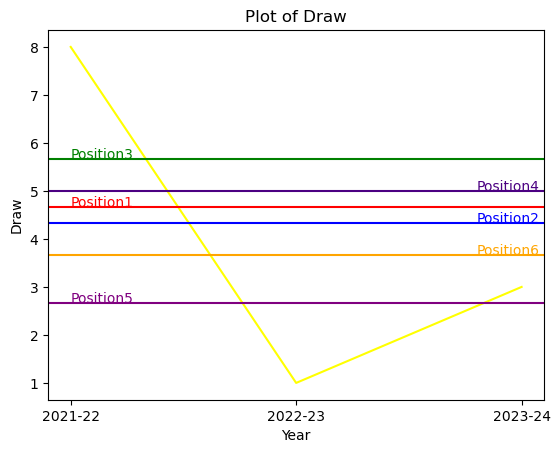

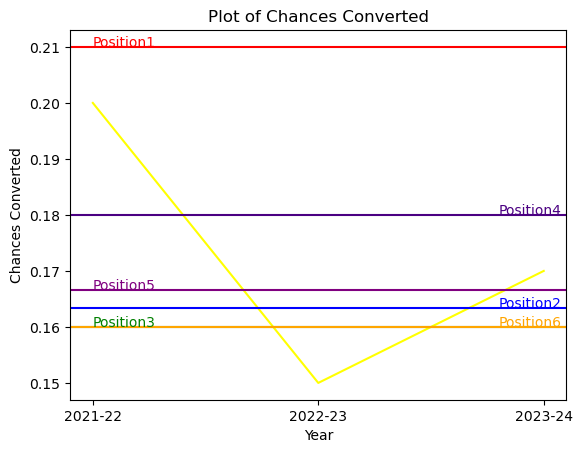

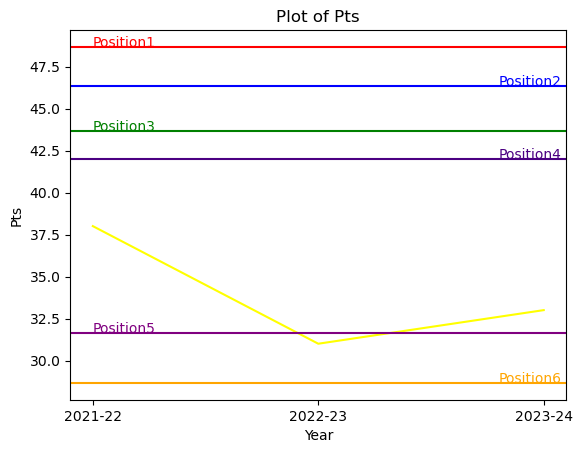

In [24]:
colors = ['red', 'blue', 'green', 'indigo', 'purple', 'orange']
for i in list(ISL_AVG_6_modify2.columns):
    plt.figure()  # This creates a new figure for each iteration
    plt.plot(ISL_KBFC['Season'], ISL_KBFC[i],color='Yellow')  # Plotting data
    plt.title(f"Plot of {i}")  # Giving a title to each plot
    plt.xlabel("Year")  # X-axis label
    plt.ylabel(i)  # Y-axis label (column name)
    for j,k in zip(range(1,7),range(0,6)):
        plt.axhline(ISL_AVG_6_Pos.loc[j,i],color=colors[k])
        if k%2==0:
            plt.text(0,ISL_AVG_6_Pos.loc[j,i],f'Position{j}',color=colors[k])
        else:
            plt.text(1.8,ISL_AVG_6_Pos.loc[j,i],f'Position{j}',color=colors[k])
            
    file_path = os.path.join(desktop_path, f"Plot {i} vs KBFC.png")
    plt.savefig(file_path)    
    plt.show()